In [1]:
# Core DS libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import mytk # My Toolkit
import wrangle # Helper functions

In [2]:
pd.options.display.max_columns = None
df, _, __ = wrangle.get_potatoes()


### The failure rate varies slightly across different product codes.

<AxesSubplot:xlabel='product_code', ylabel='failure'>

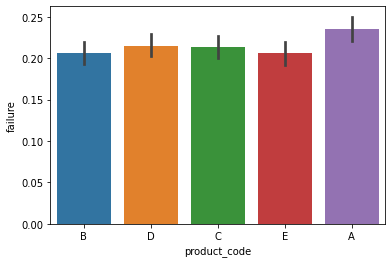

In [3]:
sns.barplot(data=df, x='product_code', y='failure')

### The attributes columns are uniform across product codes.

In [4]:
codes = df.product_code.unique().tolist()
codes.sort()

for code in codes:
    print('\nValues for '+code)
    print(df[df.product_code == code].attribute_1.value_counts())
    print(df[df.product_code == code].attribute_2.value_counts())
    print(df[df.product_code == code].attribute_3.value_counts())


Values for A
material_8    3072
Name: attribute_1, dtype: int64
9    3072
Name: attribute_2, dtype: int64
5    3072
Name: attribute_3, dtype: int64

Values for B
material_5    3211
Name: attribute_1, dtype: int64
8    3211
Name: attribute_2, dtype: int64
8    3211
Name: attribute_3, dtype: int64

Values for C
material_8    3400
Name: attribute_1, dtype: int64
5    3400
Name: attribute_2, dtype: int64
8    3400
Name: attribute_3, dtype: int64

Values for D
material_5    3067
Name: attribute_1, dtype: int64
6    3067
Name: attribute_2, dtype: int64
6    3067
Name: attribute_3, dtype: int64

Values for E
material_6    3192
Name: attribute_1, dtype: int64
6    3192
Name: attribute_2, dtype: int64
9    3192
Name: attribute_3, dtype: int64


<AxesSubplot:xlabel='measurement_17', ylabel='custom_1'>

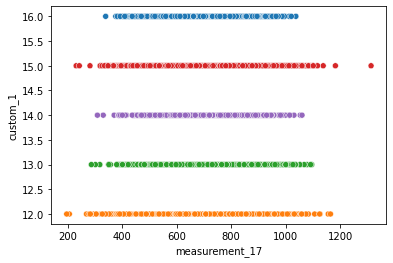

In [5]:
df['custom_1'] = df.attribute_2+df.attribute_3
sns.scatterplot(data=df, x='measurement_17', y='custom_1', hue='product_code', legend=False)

### When examining each product separately, measurement_2 is the only feature that has predictive power over failure.

In [6]:
gotchas = mytk.get_gotchas(df)
override_cat = gotchas['probable_categories']

def failure_stats_for_each_prod(df):
    prod = {}
    for code in df.product_code.unique().tolist():
        prod[code] =  df[df.product_code == code].copy()
    results = {}
    for k, v in prod.items():
        results[k] = mytk.pop_unrejected(mytk.all_the_stats(v, override_categorical=override_cat))['failure']

    print(mytk.prettify(results))

In [7]:
failure_stats_for_each_prod(df)

{
  "B": {
    "chi2": {},
    "anova": {
      "measurement_1": {
        "reject": "true",
        "h0": "There is no variance in measurement_1 between subsets of failure",
        "stat_name": "F",
        "stat": 4.218025012011149,
        "p_value": 0.040077547238429795,
        "alpha": 0.05,
        "ttest": {
          "0": {
            "reject": "false",
            "h0": "The mean of measurement_1 for failure:0 is the same as the overall population",
            "stat_name": "F",
            "stat": 0.9316139542177524,
            "p_value": 0.35162436440268685,
            "alpha": 0.05
          },
          "1": {
            "reject": "false",
            "h0": "The mean of measurement_1 for failure:1 is the same as the overall population",
            "stat_name": "F",
            "stat": -1.8418932804336616,
            "p_value": 0.06593787780357366,
            "alpha": 0.05
          }
        }
      },
      "measurement_2": {
        "reject": "true",
        "h0